## Importing libraries

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


## Data Preprocessing

#### Training Image preprocessing

In [22]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 95455 files belonging to 38 classes.


## Validation Image Preprocessing

In [23]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 29864 files belonging to 38 classes.


In [24]:
class_name=validation_set.class_names

In [25]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

## Building Model

In [26]:
cnn = tf.keras.models.Sequential()

#### Building Convolution Layer

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [33]:
cnn.add(tf.keras.layers.Flatten())

In [34]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [35]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [36]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [37]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 222, 222, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 111, 111, 64)      18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [39]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2983/2983 [==============================] - 3364s 1s/step - loss: 0.8900 - accuracy: 0.7417 - val_loss: 0.3491 - val_accuracy: 0.8941
Epoch 2/10
2983/2983 [==============================] - 3351s 1s/step - loss: 0.2666 - accuracy: 0.9176 - val_loss: 0.1825 - val_accuracy: 0.9477
Epoch 3/10
2983/2983 [==============================] - 3350s 1s/step - loss: 0.1523 - accuracy: 0.9520 - val_loss: 0.1562 - val_accuracy: 0.9569
Epoch 4/10
2983/2983 [==============================] - 3345s 1s/step - loss: 0.1047 - accuracy: 0.9668 - val_loss: 0.1435 - val_accuracy: 0.9614
Epoch 5/10
2983/2983 [==============================] - 3345s 1s/step - loss: 0.0795 - accuracy: 0.9744 - val_loss: 0.1193 - val_accuracy: 0.9702
Epoch 6/10
2983/2983 [==============================] - 3358s 1s/step - loss: 0.0587 - accuracy: 0.9808 - val_loss: 0.1122 - val_accuracy: 0.9736
Epoch 7/10
2983/2983 [==============================] - 3352s 1s/step - loss: 0.0506 - accuracy: 0.9838 - val_loss: 0.1285 -

## Evaluating Model

In [40]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2983/2983 [==============================] - 865s 290ms/step - loss: 0.0138 - accuracy: 0.9957
Training accuracy: 0.9956838488578796


In [41]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

934/934 [==============================] - 269s 288ms/step - loss: 0.1050 - accuracy: 0.9760
Validation accuracy: 0.9759576916694641


## Saving Model

In [42]:
cnn.save('trained_plant_disease_model7.keras')

In [43]:
cnn.save('trained_plant_disease_model7.h5')

C:\Users\A1\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
cnn = tf.keras.models.load_model('trained_plant_disease_model7.h5')


In [25]:

# #store .h5 file in your .py folder

#  #load h5 module
# model=tf.keras.models.load_model('trained_plant_disease_model7.h5')
# tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)

# #convert
# tflite_model = tflite_converter.convert()
# open("tf_lite_model.tflite", "wb").write(tflite_model)

# #done convertion

In [26]:
# tf_lite_model="tf_model_final.tflite"

In [45]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
tf_lite_model = "tf_model_final.tflite"
with open(tf_lite_model, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\A1\AppData\Local\Temp\tmp1exv3hsy\assets


INFO:tensorflow:Assets written to: C:\Users\A1\AppData\Local\Temp\tmp1exv3hsy\assets


In [46]:
# tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
#  #convert
# tflite_model = tflite_converter.convert()

In [47]:
tf_lite_model_name=tf_lite_model
open(tf_lite_model_name, "wb").write(tflite_model)

95891312

In [48]:
training_history.history #Return Dictionary of history

{'loss': [0.8900431394577026,
  0.26656466722488403,
  0.1522856056690216,
  0.1046924889087677,
  0.07947548478841782,
  0.05865081027150154,
  0.05061759054660797,
  0.04435845836997032,
  0.039854973554611206,
  0.03318982571363449],
 'accuracy': [0.7416688203811646,
  0.9176051616668701,
  0.9520192742347717,
  0.9667696952819824,
  0.9743543863296509,
  0.9807867407798767,
  0.9838248491287231,
  0.9861400723457336,
  0.9873657822608948,
  0.9895972013473511],
 'val_loss': [0.34909746050834656,
  0.18248233199119568,
  0.15620112419128418,
  0.14350004494190216,
  0.11927974969148636,
  0.11220815032720566,
  0.12853626906871796,
  0.10600047558546066,
  0.10687793791294098,
  0.10502805560827255],
 'val_accuracy': [0.8940865397453308,
  0.9476627111434937,
  0.9568711519241333,
  0.9614251255989075,
  0.9701647758483887,
  0.9736137390136719,
  0.9701982140541077,
  0.9754554033279419,
  0.9761251211166382,
  0.9759576916694641]}

In [49]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [50]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [51]:
training_history.history['accuracy']

[0.7416688203811646,
 0.9176051616668701,
 0.9520192742347717,
 0.9667696952819824,
 0.9743543863296509,
 0.9807867407798767,
 0.9838248491287231,
 0.9861400723457336,
 0.9873657822608948,
 0.9895972013473511]

## Accuracy Visualization

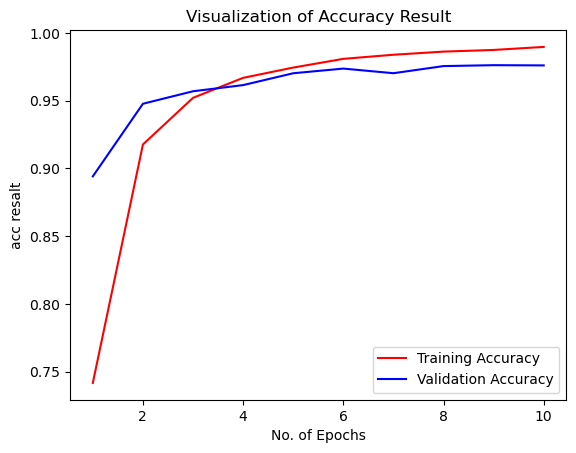

In [52]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('acc resalt')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [53]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [54]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 29864 files belonging to 38 classes.


In [55]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

29864/29864 [==============================] - 602s 20ms/step


In [56]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [57]:
Y_true

<tf.Tensor: shape=(29864,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [58]:
predicted_categories

<tf.Tensor: shape=(29864,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [59]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

In [60]:
from sklearn.metrics import f1_score

# Assuming Y_true contains the true labels and predicted_categories contains the predicted labels
f1 = f1_score(Y_true, predicted_categories, average='weighted')
print("F1-score:", f1)


F1-score: 0.9759164489344162


In [61]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       721
                                 Apple___Black_rot       0.98      0.99      0.99       684
                          Apple___Cedar_apple_rust       0.90      0.97      0.93       549
                                   Apple___healthy       0.98      0.99      0.98      1047
                               Blueberry___healthy       0.97      0.97      0.97       937
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       737
                 Cherry_(including_sour)___healthy       0.97      0.98      0.97       764
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.93       584
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       838
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.98      0.

## Confusion Matrix Visualization